In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
matches = pd.read_csv('C:/Users/Hp/Desktop/WPL/matches.csv')
deliveries = pd.read_csv('C:/Users/Hp/Desktop/WPL/deliveries.csv')

In [3]:
all_matches = matches[(matches['team1'].isin(['Sunrisers Hyderabad', 'Royal Challengers Bangalore'])) & (matches['team2'].isin(['Sunrisers Hyderabad', 'Royal Challengers Bangalore']))]
data = pd.merge(matches, deliveries, how = "inner", left_on = 'id', right_on = 'match_id')
sub_data = data[(data['team1'].isin(['Sunrisers Hyderabad', 'Royal Challengers Bangalore'])) & (data['team2'].isin(['Sunrisers Hyderabad', 'Royal Challengers Bangalore']))]

### Who will win the match??

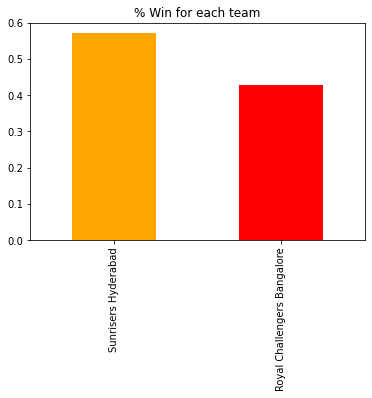

In [4]:
all_matches['winner'].value_counts(normalize=True).plot.bar(title='% Win for each team', color=['Orange', 'Red'])

In [5]:
eliminator = matches.groupby('season')['id'].unique().apply(lambda x : x[-3])

In [6]:
match_id = []
for i in eliminator:
    match_id.append(i)

In [7]:
sub_data1 = matches[matches['id'].isin(match_id)]

In [8]:
sub_data1.shape

(12, 18)

In [9]:
sub_data1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
56,57,2017,Bangalore,5/17/2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,NaN
114,115,2008,Mumbai,5/30/2008,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen,NaN
171,172,2009,Centurion,5/22/2009,Delhi Capitals,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,6,AC Gilchrist,SuperSport Park,BR Doctrove,DJ Harper,NaN
231,232,2010,Mumbai,4/22/2010,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,normal,0,Chennai Super Kings,38,0,DE Bollinger,Dr DY Patil Sports Academy,BR Doctrove,RB Tiffin,NaN
304,305,2011,Mumbai,5/25/2011,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,MM Patel,Wankhede Stadium,Asad Rauf,SJA Taufel,NaN


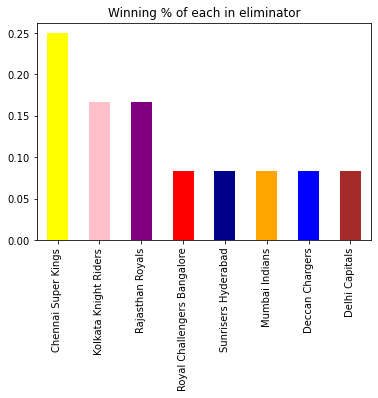

In [10]:
sub_data1['winner'].value_counts(normalize=True).plot.bar(title='Winning % of each in eliminator', color=['Yellow', 'Pink', 'Purple', 'Red', 'Darkblue', 'Orange', 'Blue', 'Brown'])

In [11]:
sub_data1[(sub_data1['team1'].isin(['Sunrisers Hyderabad', 'Royal Challengers Bangalore'])) | (sub_data1['team2'].isin(['Sunrisers Hyderabad', 'Royal Challengers Bangalore']))]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
56,57,2017,Bangalore,5/17/2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,NaN
454,455,2013,Delhi,5/22/2013,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,4,BJ Hodge,Feroz Shah Kotla,S Ravi,RJ Tucker,NaN
573,574,2015,Pune,5/20/2015,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,71,0,AB de Villiers,Maharashtra Cricket Association Stadium,AK Chaudhary,C Shamshuddin,NaN
633,634,2016,Delhi,5/25/2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
753,11413,2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


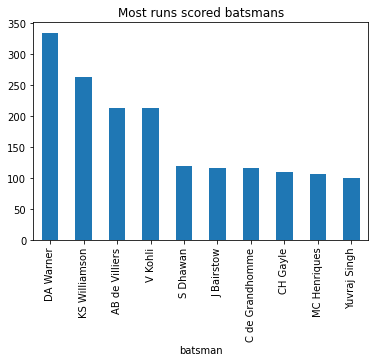

In [12]:
sub_data[sub_data['season']>2015].groupby(['batsman'])['batsman_runs'].sum().sort_values(ascending=False).head(10).plot.bar(title='Most runs scored batsmans')

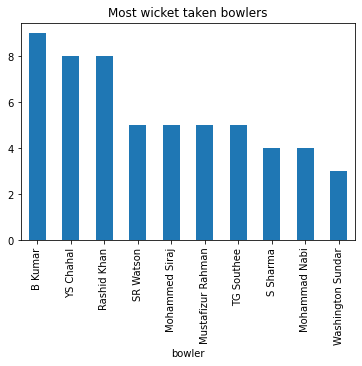

In [13]:
sub_data[sub_data['season']>2015].groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10).plot.bar(title='Most wicket taken bowlers')

### Sandeep Sharma Economy Rate and Boundaries conceded

In [14]:
sub_data2 = sub_data[sub_data['bowler']=='Sandeep Sharma']

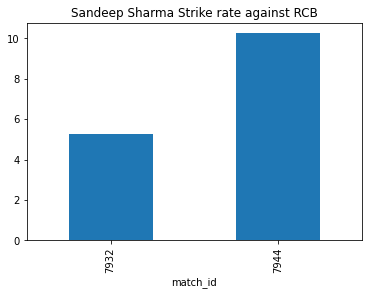

In [15]:
(sub_data2.groupby(['match_id'])['total_runs'].sum()/sub_data2.groupby(['match_id'])['over'].unique().apply(lambda x : len(x))).plot.bar(title='Sandeep Sharma Strike rate against RCB')

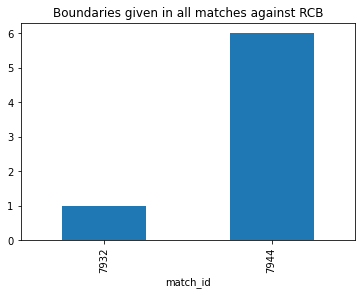

In [16]:
sub_data2[sub_data2['total_runs'].isin([4, 5, 6, 7])].groupby(['match_id'])['ball'].count().plot.bar(title='Boundaries given in all matches against RCB')

In [17]:
sub_data3 = data[data['bowler']=='Sandeep Sharma']

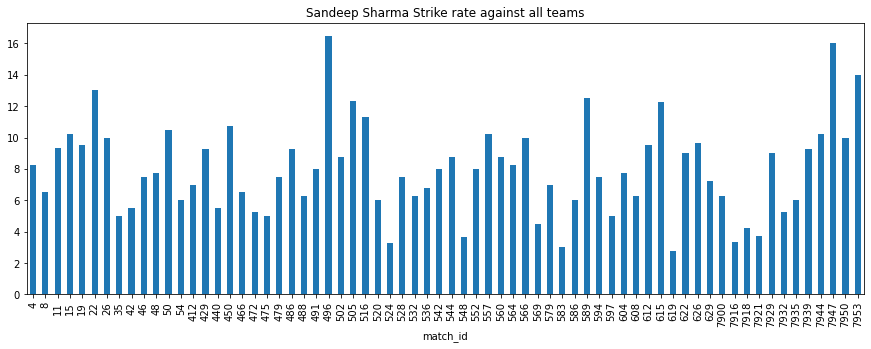

In [18]:
(sub_data3.groupby(['match_id'])['total_runs'].sum()/sub_data3.groupby(['match_id'])['over'].unique().apply(lambda x : len(x))).plot.bar(title='Sandeep Sharma Strike rate against all teams', figsize=(15,5))

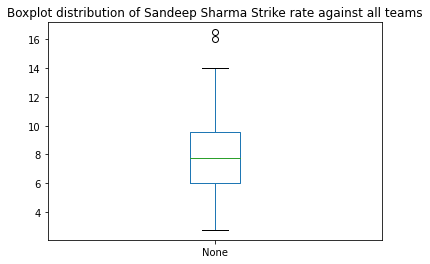

In [19]:
(sub_data3.groupby(['match_id'])['total_runs'].sum()/sub_data3.groupby(['match_id'])['over'].unique().apply(lambda x : len(x))).plot.box(title='Boxplot distribution of Sandeep Sharma Strike rate against all teams')

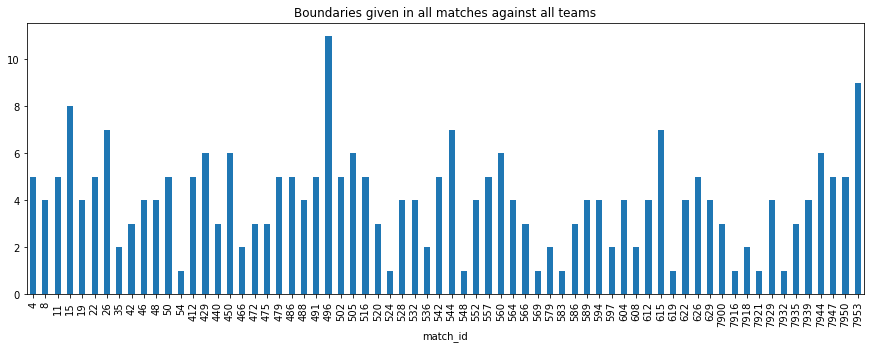

In [20]:
sub_data3[sub_data3['total_runs'].isin([4, 5, 6, 7])].groupby(['match_id'])['ball'].count().plot.bar(title='Boundaries given in all matches against all teams', figsize=(15, 5))

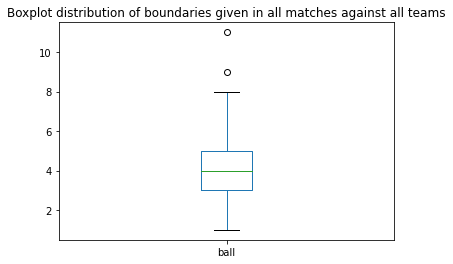

In [21]:
sub_data3[sub_data3['total_runs'].isin([4, 5, 6, 7])].groupby(['match_id'])['ball'].count().plot.box(title='Boxplot distribution of boundaries given in all matches against all teams')

### Batsman with strike rate above 130 and hit more than 3 boundaries

In [22]:
def Repeat(df, filters):
    for i, j in filters:
        df = df.drop(df[(df['match_id']==i) & (df['bowler']==j)].index)
    return df

In [23]:
def Power_hitter(df):
    balls_faced = pd.DataFrame(df.groupby(['match_id', 'batsman'])['ball'].count())
    balls_faced_index = balls_faced[balls_faced['ball']<=10].index
    df = Repeat(df, balls_faced_index)
    
    strike_rate = pd.DataFrame((df.groupby(['match_id', 'batsman'])['batsman_runs'].sum()/df.groupby(['match_id', 'batsman'])['ball'].count())*100)
    strike_index = strike_rate[strike_rate[0]<=130].index
    df = Repeat(df, strike_index)
    
    boundaries_hit = pd.DataFrame(df[df['batsman_runs'].isin([4, 5, 6, 7])].groupby(['match_id', 'batsman'])['batsman_runs'].value_counts())
    boundaries_hit.rename(columns={'batsman_runs' : 'boundaries_hit'}, inplace=True)
    boundaries_hit.reset_index(inplace=True)
    boundaries_hit_index = boundaries_hit[(boundaries_hit['batsman_runs'].isin([4, 5])) & (boundaries_hit['boundaries_hit']<2)].set_index(['match_id', 'batsman']).index
    
    total_boundaries = pd.DataFrame(boundaries_hit.groupby(['match_id', 'batsman'])['boundaries_hit'].sum())
    total_boundaries_hit_index = total_boundaries[total_boundaries['boundaries_hit']<=3].index
    df = Repeat(df, total_boundaries_hit_index)
    df = Repeat(df, boundaries_hit_index)
    
    return df

In [24]:
sub_data4 = Power_hitter(sub_data.copy())

In [27]:
((sub_data4.groupby(['match_id', 'batsman'])['batsman_runs'].sum()/sub_data4.groupby(['match_id', 'batsman'])['ball'].count())*100).groupby('batsman').mean().sort_values(ascending=False).head(10)

batsman
SN Khan       318.750000
AJ Finch      225.000000
TS Mills      200.000000
AN Ahmed      200.000000
VR Aaron      200.000000
WP Saha       195.555556
MJ Guptill    183.333333
DA Warner     173.648990
KM Jadhav     171.428571
S Rana        171.428571
dtype: float64

### (# runs scored of boundaries - # runs scored of 1s, 2s or 3s) / total runs _scored

In [29]:
dummy = pd.DataFrame(sub_data.groupby(['match_id', 'batsman'])['ball'].count())

In [31]:
index = dummy[dummy['ball']<=10].index

In [32]:
sub_data5 = sub_data.copy()

In [33]:
for i, j in index:
    sub_data5.drop(sub_data5[(sub_data5['match_id']==i) & (sub_data5['bowler']==j)].index, inplace=True)

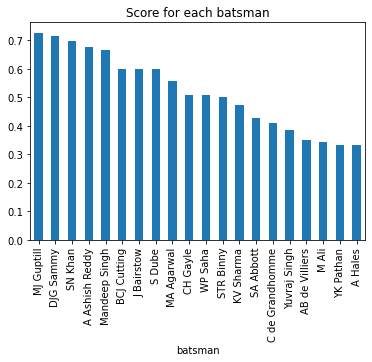

In [42]:
((sub_data5[sub_data5['batsman_runs'].isin([4, 5, 6, 7])].groupby(['match_id', 'batsman'])['batsman_runs'].sum() - sub_data5[sub_data5['batsman_runs'].isin([1, 2, 3])].groupby(['match_id', 'batsman'])['batsman_runs'].sum()) / (sub_data5.groupby(['match_id', 'batsman'])['batsman_runs'].sum())).groupby('batsman').mean().sort_values(ascending=False).head(20).plot.bar(title='Score for each batsman')

### Wickets lose in the powerplay

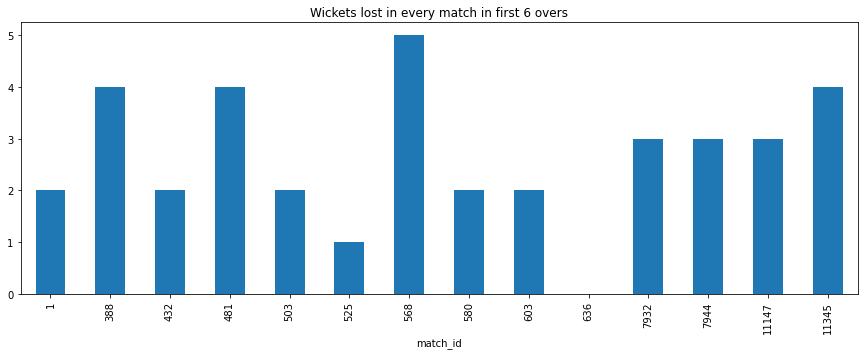

In [40]:
sub_data[sub_data['over'].isin([1, 2, 3, 4, 5, 6])].groupby(['match_id'])['player_dismissed'].count().plot.bar(title='Wickets lost in every match in first 6 overs', figsize=(15,5))

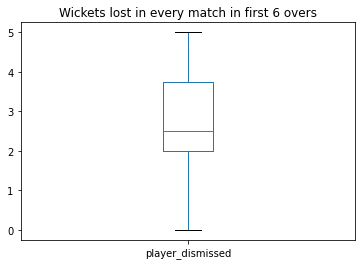

In [41]:
sub_data[sub_data['over'].isin([1, 2, 3, 4, 5, 6])].groupby(['match_id'])['player_dismissed'].count().plot.box(title='Wickets lost in every match in first 6 overs')